float32


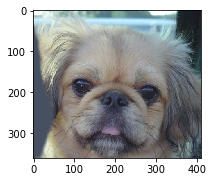

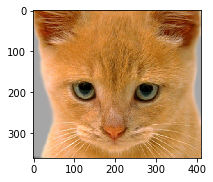

In [1]:
import cv2
import numpy as np
from numpy import fft as fft
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from utils import vis_hybrid_image, load_image, save_image
from student_code import my_imfilter, create_hybrid_image
%load_ext autoreload
%autoreload 2


# load_image loads image as an RGB image.
# The resultant array data-type is 'floting point' numpy array
# elements r
image1 = load_image('../data/dog.bmp')
image2 = load_image('../data/cat.bmp')

print(image1.dtype)

# display the dog and cat images
plt.figure(figsize=(3,3)); plt.imshow((image1*255).astype(np.uint8));
plt.figure(figsize=(3,3)); plt.imshow((image2*255).astype(np.uint8));

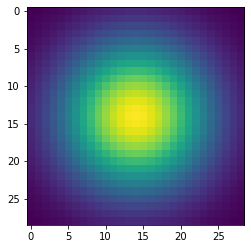

In [2]:
cutoff_frequency = 7
filter = cv2.getGaussianKernel(ksize=cutoff_frequency*4+1,
                               sigma=cutoff_frequency)
filter = np.dot(filter, filter.T)

# let's take a look at the filter!
plt.figure(figsize=(4,4)); plt.imshow(filter)

#let's make the function
#plt.imshow(image1[:,:,0],cmap='gray');filter

In [3]:
def PAD(img,width):
    img_cp = np.zeros((img.shape[0]+2*width,img.shape[1]+2*width,3))
    
    img_cp[:,:,0]=np.pad(img[:,:,0],width,'reflect')
    img_cp[:,:,1]=np.pad(img[:,:,1],width,'reflect')
    img_cp[:,:,2]=np.pad(img[:,:,2],width,'reflect')
    return img_cp

In [4]:
img1_fft=fft.fftshift(fft.fft2(image1[:,:,-1]))

In [5]:
fft_scaled = np.log(1+np.abs(img1_fft))

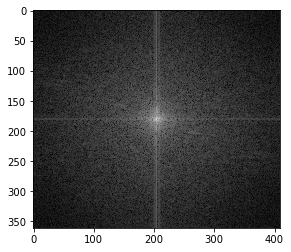

In [6]:
plt.imshow(fft_scaled,cmap='gray')

In [7]:
ar = np.arange(-500,500)
x, y = np.meshgrid(ar, ar)

# # rough/rippling
# c2 = c

# smooth
z = np.sqrt(x**2+y**2)
c2 = 1/(1+(z/15)**2)

cfl = fft_scaled*c2
plt.imshow(np.abs(fft.ifft2(cfl)), cmap='gray')
plt.show()

ValueError: operands could not be broadcast together with shapes (361,410) (1000,1000) 

In [ ]:
ar

In [ ]:
plt.imshow(PAD(image1,29//2))

In [ ]:
def conv2(img,ker):
    
    h,w,c=img.shape
    n=ker.shape[0]//2
    res = np.zeros(img.shape)
    
    for i in range(n,h-n):
        for j in range(n,w-n):
            sum0=np.sum(ker*img[i-n:i+n+1,j-n:j+n+1,0])
            res[i,j,0]=sum0
            sum1=np.sum(ker*img[i-n:i+n+1,j-n:j+n+1,1])
            res[i,j,1]=sum1
            sum2=np.sum(ker*img[i-n:i+n+1,j-n:j+n+1,2])
            res[i,j,2]=sum2
    return res[n:h-n,m:w-m]

In [ ]:
output=conv2(PAD(image1,29//2),filter)

In [ ]:
image1.shape

In [ ]:
conv2(PAD(image1,29//2),filter).shape

In [ ]:
len(ker)//2:image.shape[0],len(ker)//2:image.shape[1]

In [ ]:
plt.imshow(conv2(PAD(image1,29//2),filter))

In [ ]:
cat=image2-conv2(image2,filter)
plt.imshow(cat+0.3,cmap='gray')

In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(output+cat+0.3,cmap='gray')

In [ ]:
padim1=np.pad(image1[:,:,0],29//2)+np.pad(image1[:,:,1],29//2)+np.pad(image1[:,:,2],29//2)
plt.imshow(padim1)

In [ ]:
def PAD(img,width):
    img_cp = np.zeros((img.shape[0]+2*width,img.shape[1]+2*width,3))
    
    img_cp[:,:,0]=np.pad(img[:,:,0],width,'reflect')
    img_cp[:,:,1]=np.pad(img[:,:,1],width,'reflect')
    img_cp[:,:,2]=np.pad(img[:,:,2],width,'reflect')
    return img_cp

In [ ]:
plt.imshow(PAD(image1,29//2))

In [ ]:
plt.imshow(conv2(PAD(image1,29//6),filter))

In [ ]:
ein = load_image('../data/einstein.bmp')
mar = load_image('../data/marilyn.bmp')

In [ ]:
cutoff_frequency = 3
filter = cv2.getGaussianKernel(ksize=cutoff_frequency*4+1,
                               sigma=cutoff_frequency)
filter = np.dot(filter, filter.T)

In [ ]:
einp= PAD(ein,9//2)
marp=PAD(mar,9//2)

In [ ]:
plt.imshow(conv2(einp,filter))

In [ ]:
plt.imshow(marp-conv2(marp,filter)+0.4)

In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(marp-conv2(marp,filter)+conv2(einp,filter)+.1)

In [ ]:
def fn(image,filter):
    width=filter.shape[1]
    width=(width-1)//2
    
    imagest=np.zeros((image.shape[:2]+2*width,3))
    imagest[:,:,0]=np.pad(image[:,:,0],width,'reflect')
    imagest[:,:,1]=np.pad(image[:,:,1],width,'reflect')
    imagest[:,:,2]=np.pad(image[:,:,2],width,'reflect')
    
    #filter=filter[::-1,::-1]
    h,w=imagest.shape[:2]
    n=len(filter)//2
    filtered_image = np.zeros(imagest.shape)
    
    for i in range(n,h-n):
        for j in range(n,w-n):
            sum0=np.sum(filter*imagest[i-n:i+n+1,j-n:j+n+1,0])
            filtered_image[i,j,0]=sum0
            sum1=np.sum(filter*imagest[i-n:i+n+1,j-n:j+n+1,1])
            filtered_image[i,j,1]=sum1
            sum2=np.sum(filter*imagest[i-n:i+n+1,j-n:j+n+1,2])
            filtered_image[i,j,2]=sum2
    

  ### END OF STUDENT CODE ####
  ############################

    return filtered_image

In [ ]:
plt.imshow(fn(ein,filter))

In [ ]:
import time

# Direct. Slow Method
large_blur_filter = np.dot(large_1d_blur_filter, large_1d_blur_filter.T)
t = time.time()
large_blur_image = my_imfilter(test_image, large_blur_filter);
t = time.time() - t
print('{:f} seconds'.format(t))

In [ ]:
import numpy as np
#### DO NOT IMPORT cv2 

def my_imfilter(image, filter):
    
    """
  Apply a filter to an image. Return the filtered image.

  Args
  - image: numpy nd-array of dim (m, n, c)
  - filter: numpy nd-array of dim (k, k)
  Returns
  - filtered_image: numpy nd-array of dim (m, n, c)

  HINTS:
  - You may not use any libraries that do the work for you. Using numpy to work
   with matrices is fine and encouraged. Using opencv or similar to do the
   filtering for you is not allowed.
  - I encourage you to try implementing this naively first, just be aware that
   it may take an absurdly long time to run. You will need to get a function
   that takes a reasonable amount of time to run so that I can verify
   your code works.
  - Remember these are RGB images, accounting for the final image dimension.
  """

    assert filter.shape[0] % 2 == 1
    assert filter.shape[1] % 2 == 1
  

  ############################
  ### TODO: YOUR CODE HERE ###
    width=filter.shape[0]
    width=(width)//2
    
    
    image_cp0=np.pad(image[:,:,0],width,'reflect')
    image_cp1=np.pad(image[:,:,1],width,'reflect')
    image_cp2=np.pad(image[:,:,2],width,'reflect')
    
    imagest=np.dstack([image_cp0,image_cp1,image_cp2])

    filter=filter[::-1,::-1]
    h,w=imagest.shape[:2]
    n=filter.shape[0]//2
    m=filter.shape[1]//2
    filtered_image = np.zeros(imagest.shape)
    
    for i in range(n,h-n):
        for j in range(m,w-m):
            sum0=np.sum(filter*imagest[i-n:i+n+1,j-m:j+m+1,0])
            filtered_image[i,j,0]=sum0
            sum1=np.sum(filter*imagest[i-n:i+n+1,j-m:j+m+1,1])
            filtered_image[i,j,1]=sum1
            sum2=np.sum(filter*imagest[i-n:i+n+1,j-m:j+m+1,2])
            filtered_image[i,j,2]=sum2
    

  ### END OF STUDENT CODE ####
  ############################

    return filtered_image[n:h-n,m:w-m]

def create_hybrid_image(image1, image2, filter):
    """
    Takes two images and creates a hybrid image. Returns the low
    frequency content of image1, the high frequency content of
    image 2, and the hybrid image.

    Args
    - image1: numpy nd-array of dim (m, n, c)
    - image2: numpy nd-array of dim (m, n, c)
    Returns
    - low_frequencies: numpy nd-array of dim (m, n, c)
    - high_frequencies: numpy nd-array of dim (m, n, c)
    - hybrid_image: numpy nd-array of dim (m, n, c)

    HINTS:
    - You will use your my_imfilter function in this function.
    - You can get just the high frequency content of an image by removing its low
      frequency content. Think about how to do this in mathematical terms.
    - Don't forget to make sure the pixel values are >= 0 and <= 1. This is known
      as 'clipping'.
    - If you want to use images with different dimensions, you should resize them
      in the notebook code.
    """

    assert image1.shape[0] == image2.shape[0]
    assert image1.shape[1] == image2.shape[1]
    assert image1.shape[2] == image2.shape[2]

  ############################
  ### TODO: YOUR CODE HERE ###
    width=filter.shape[0]
    width=(width-1)//2
    image_cp0=np.pad(image2[:,:,0],width,'reflect')
    image_cp1=np.pad(image2[:,:,1],width,'reflect')
    image_cp2=np.pad(image2[:,:,2],width,'reflect')
    
    imagest2=np.dstack([image_cp0,image_cp1,image_cp2])

    image_c0=np.pad(image1[:,:,0],width,'reflect')
    image_c1=np.pad(image1[:,:,1],width,'reflect')
    image_c2=np.pad(image1[:,:,2],width,'reflect')
    
    imagest1=np.dstack([image_c0,image_c1,image_c2])

    
    low_frequencies=my_imfilter(imagest1, filter)
    high_frequencies=imagest2-my_imfilter(imagest2, filter)
    hybrid_image=low_frequencies+high_frequencies

  ### END OF STUDENT CODE ####
  ############################

    return low_frequencies, high_frequencies, hybrid_image


In [ ]:
cutoff_frequency = 4
filter = cv2.getGaussianKernel(ksize=cutoff_frequency*4+1,
                               sigma=cutoff_frequency)
filter = np.dot(filter, filter.T)

In [ ]:
low_frequencies, high_frequencies, hybrid_image=create_hybrid_image(ein,mar,filter)
vis2 = vis_hybrid_image(hybrid_image)

In [ ]:
plt.figure(); plt.imshow((low_frequencies*255).astype(np.uint8));
plt.figure(); plt.imshow(((high_frequencies+0.5)*255).astype(np.uint8));
plt.figure(figsize=(20, 20)); plt.imshow(vis2);

In [ ]:

plt.imshow(low_frequencies)
plt.imshow(high_frequencies)
plt.imshow(low_frequencies)